# MODELOS DE SERIES TEMPORALES

In [1]:
# Importamos las librerías necesarias para este notebook:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from pandas.core import datetools
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

C:\Users\usuario\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Establecemos algunos parámetros visualizar los gráficos sin problemas(estilo ggplot y tamaño 15x10)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [3]:
# Leemos los datos de nuestro fichero de train:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,Unnamed: 0,Dia,Impresiones,Clics,Conversiones,Coste,dia_semana,mes,Conversiones_lag1,Conversiones_lag2,...,Coste_lag1,Coste_lag2,Coste_lag3,Coste_lag4,Coste_lag5,Coste_lag6,Coste_lag7,Coste_lag8,Coste_lag9,Coste_lag10
0,2015-01-11,2015-01-11,40490.0,709.0,6.0,92.36,6,0,4.0,4.0,...,76.28,77.50,74.69,81.32,88.80,40.79,53.13,80.37,104.24,65.62
1,2015-01-12,2015-01-12,37826.0,690.0,6.0,89.62,0,0,6.0,4.0,...,92.36,76.28,77.50,74.69,81.32,88.80,40.79,53.13,80.37,104.24
2,2015-01-13,2015-01-13,39804.0,787.0,10.0,101.76,1,0,6.0,6.0,...,89.62,92.36,76.28,77.50,74.69,81.32,88.80,40.79,53.13,80.37
3,2015-01-14,2015-01-14,41566.0,831.0,5.0,111.02,2,0,10.0,6.0,...,101.76,89.62,92.36,76.28,77.50,74.69,81.32,88.80,40.79,53.13
4,2015-01-15,2015-01-15,40663.0,771.0,7.0,102.51,3,0,5.0,10.0,...,111.02,101.76,89.62,92.36,76.28,77.50,74.69,81.32,88.80,40.79


In [5]:
# Eliminamos la columna 'Unnamed: 0' que es redundante.
train = train.drop(['Unnamed: 0'], axis=1)

In [6]:
train.describe()

,Impresiones,Clics,Conversiones,Coste,dia_semana,mes,Conversiones_lag1,Conversiones_lag2,Conversiones_lag3,Conversiones_lag4,...,Coste_lag1,Coste_lag2,Coste_lag3,Coste_lag4,Coste_lag5,Coste_lag6,Coste_lag7,Coste_lag8,Coste_lag9,Coste_lag10
count,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,...,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000
mean,75598.106109,1679.157556,22.484459,223.639829,3.000000,5.010718,22.459807,22.439443,22.438371,22.425509,...,223.605295,223.578757,223.574673,223.547417,223.503526,223.405477,223.304137,223.249400,223.238950,223.103012
std,63493.825601,1663.876422,27.822838,241.213871,2.003752,3.329201,27.829021,27.835577,27.836307,27.841594,...,241.232678,241.247403,241.249894,241.264543,241.285349,241.341043,241.392720,241.419362,241.424307,241.477363
min,2716.000000,32.000000,0.000000,5.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.450000,5.450000,5.450000,5.450000,5.450000,5.450000,5.450000,5.450000,5.450000,5.450000
25%,39567.000000,709.000000,8.000000,77.950000,1.000000,2.000000,8.000000,8.000000,8.000000,8.000000,...,77.630000,77.590000,77.500000,77.500000,77.500000,77.380000,77.360000,77.360000,77.360000,77.330000
50%,55386.000000,1118.000000,14.000000,135.720000,3.000000,5.000000,14.000000,14.000000,14.000000,13.000000,...,135.720000,135.720000,135.720000,135.720000,135.720000,135.720000,134.990000,134.990000,134.990000,134.530000
75%,87964.000000,1993.000000,24.000000,255.670000,5.000000,8.000000,23.000000,23.000000,23.000000,23.000000,...,255.670000,255.670000,255.670000,255.670000,255.670000,255.670000,255.670000,255.670000,255.670000,255.670000
max,427920.000000,11738.000000,284.000000,1365.600000,6.000000,11.000000,284.000000,284.000000,284.000000,284.000000,...,1365.600000,1365.600000,1365.600000,1365.600000,1365.600000,1365.600000,1365.600000,1365.600000,1365.600000,1365.600000


In [7]:
train.Dia = pd.DatetimeIndex(train.Dia)

In [8]:
# Cambiamos el índice a la columna Dia (Fecha)
train.index = pd.PeriodIndex(train.Dia, freq='D')

In [9]:
# Ordenamos los datos por fecha para asegurarnos.
train = train.sort_values(by = "Dia")

In [10]:
train.head()

,Dia,Impresiones,Clics,Conversiones,Coste,dia_semana,mes,Conversiones_lag1,Conversiones_lag2,Conversiones_lag3,...,Coste_lag1,Coste_lag2,Coste_lag3,Coste_lag4,Coste_lag5,Coste_lag6,Coste_lag7,Coste_lag8,Coste_lag9,Coste_lag10
Dia,,,,,,,,,,,,,,,,,,,,,
2015-01-11,2015-01-11,40490.0,709.0,6.0,92.36,6,0,4.0,4.0,3.0,...,76.28,77.50,74.69,81.32,88.80,40.79,53.13,80.37,104.24,65.62
2015-01-12,2015-01-12,37826.0,690.0,6.0,89.62,0,0,6.0,4.0,4.0,...,92.36,76.28,77.50,74.69,81.32,88.80,40.79,53.13,80.37,104.24
2015-01-13,2015-01-13,39804.0,787.0,10.0,101.76,1,0,6.0,6.0,4.0,...,89.62,92.36,76.28,77.50,74.69,81.32,88.80,40.79,53.13,80.37
2015-01-14,2015-01-14,41566.0,831.0,5.0,111.02,2,0,10.0,6.0,6.0,...,101.76,89.62,92.36,76.28,77.50,74.69,81.32,88.80,40.79,53.13
2015-01-15,2015-01-15,40663.0,771.0,7.0,102.51,3,0,5.0,10.0,6.0,...,111.02,101.76,89.62,92.36,76.28,77.50,74.69,81.32,88.80,40.79


In [11]:
# Nos quedamos únicamente con las columnas 'Dia', 'Conversiones' y 'Coste.
train1 =train[['Dia', 'Conversiones','Coste']]

In [12]:
train1.head()

,Dia,Conversiones,Coste
Dia,,,
2015-01-11,2015-01-11,6.0,92.36
2015-01-12,2015-01-12,6.0,89.62
2015-01-13,2015-01-13,10.0,101.76
2015-01-14,2015-01-14,5.0,111.02
2015-01-15,2015-01-15,7.0,102.51


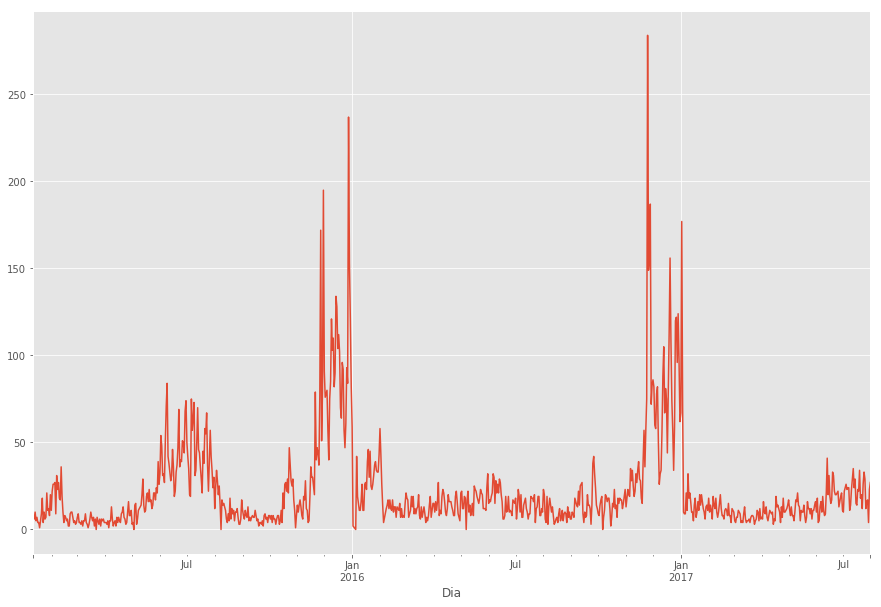

In [13]:
train1.Conversiones.plot()

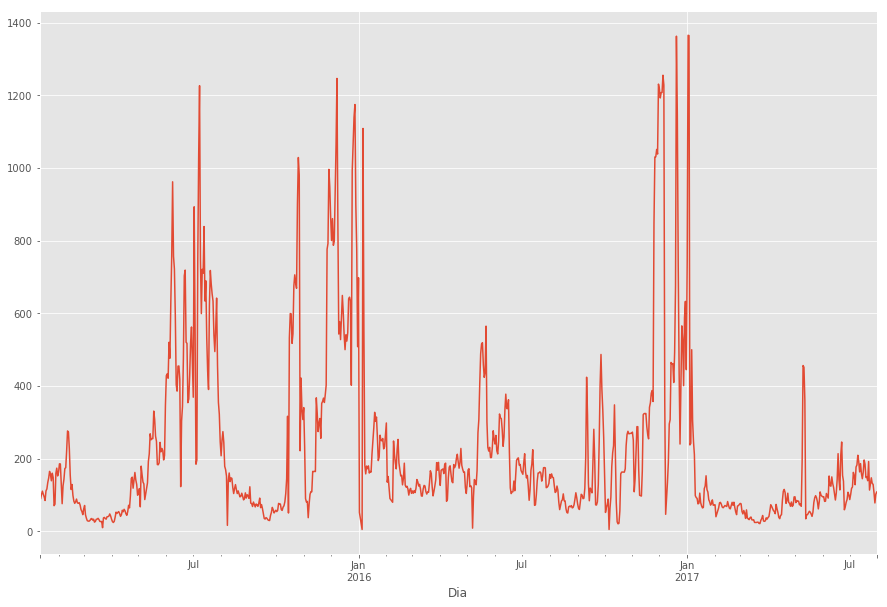

In [14]:
train1.Coste.plot()

### Transformacion - Logaritmo
Transformamos a los datos aplicando el logaritmo. De esta manera estabilizaremos la varianza de la serie temporal.

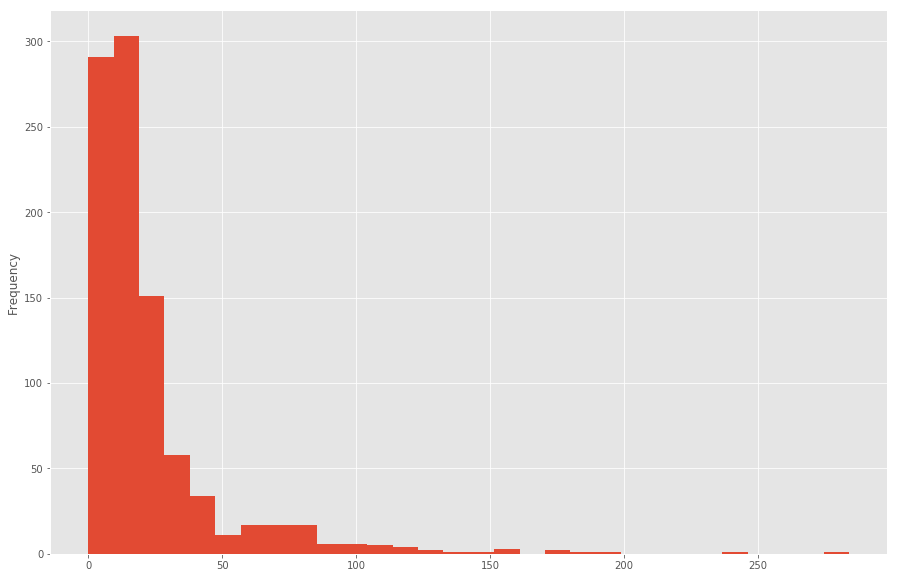

In [15]:
train1.Conversiones.plot(kind = "hist", bins = 30)

In [16]:
# Agregamos una columna que calcula logaritmo de otra columna.
train1['ConversionesLog'] = train1['Conversiones'].apply(lambda x: np.log(x+1))

C:\Users\usuario\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Debido a que existen algunos datos con 0 conversiones si hubieramos aplicado el logaritmo directamente sobre el número de conversiones hubíesemos obtenido -inf como resultado del cálculo. Esto nos hubiera ocasionado problemas a la hora de realizar cálculo y por este motivo hemos aplicado el logaritmo sobre el número de conversiones + 1. De esta manera no sólo no obtenemos errores si no que no perdemos información.

In [17]:
train1.head()

,Dia,Conversiones,Coste,ConversionesLog
Dia,,,,
2015-01-11,2015-01-11,6.0,92.36,1.945910
2015-01-12,2015-01-12,6.0,89.62,1.945910
2015-01-13,2015-01-13,10.0,101.76,2.397895
2015-01-14,2015-01-14,5.0,111.02,1.791759
2015-01-15,2015-01-15,7.0,102.51,2.079442


In [18]:
train1.describe()

,Conversiones,Coste,ConversionesLog
count,933.000000,933.000000,933.000000
mean,22.484459,223.639829,2.752063
std,27.822838,241.213871,0.858137
min,0.000000,5.450000,0.000000
25%,8.000000,77.950000,2.197225
50%,14.000000,135.720000,2.708050
75%,24.000000,255.670000,3.218876
max,284.000000,1365.600000,5.652489


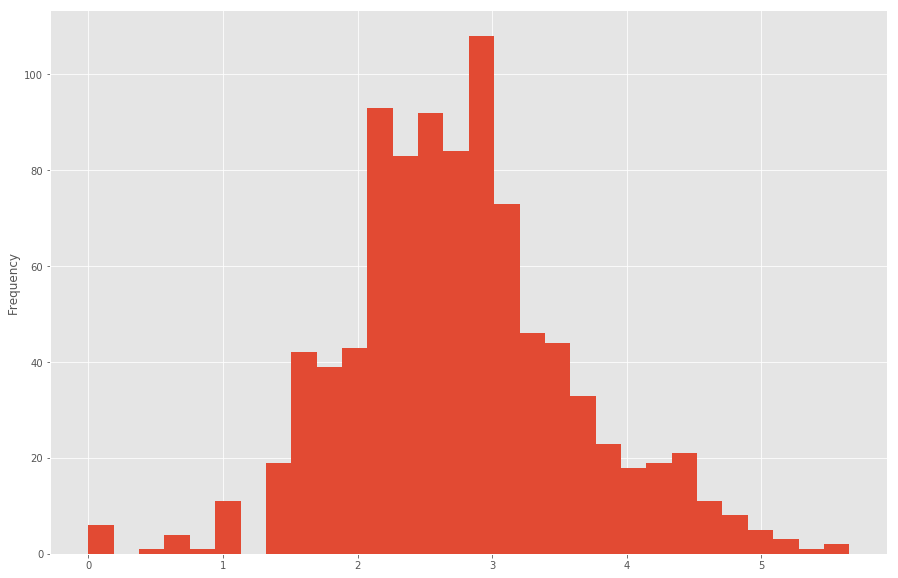

In [19]:
train1.ConversionesLog.plot(kind = "hist", bins = 30)

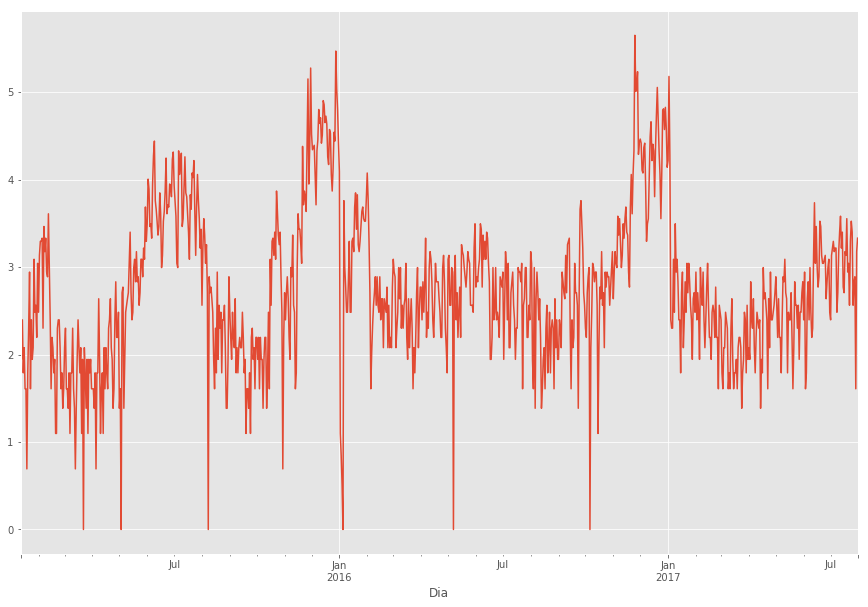

In [20]:
train1.ConversionesLog.plot()

## Modelo de series temporales
Construiremos un modelo de series temporales para obtener un pronóstico de las conversiones. 
Comencemos con los tres modelos más básicos:
- Mean Constant Model
- Linear Trend Model
- Random Walk Model

 ### Mean Constant Model
Este modelo de pronóstico muy simple se llamará el "model_mean"

In [21]:
model_mean_pred = train1.ConversionesLog.mean()

In [22]:
# Guardamos esto como nuestro valor de predicción media.
train1["ConversionesMean"] = np.exp(model_mean_pred)

C:\Users\usuario\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


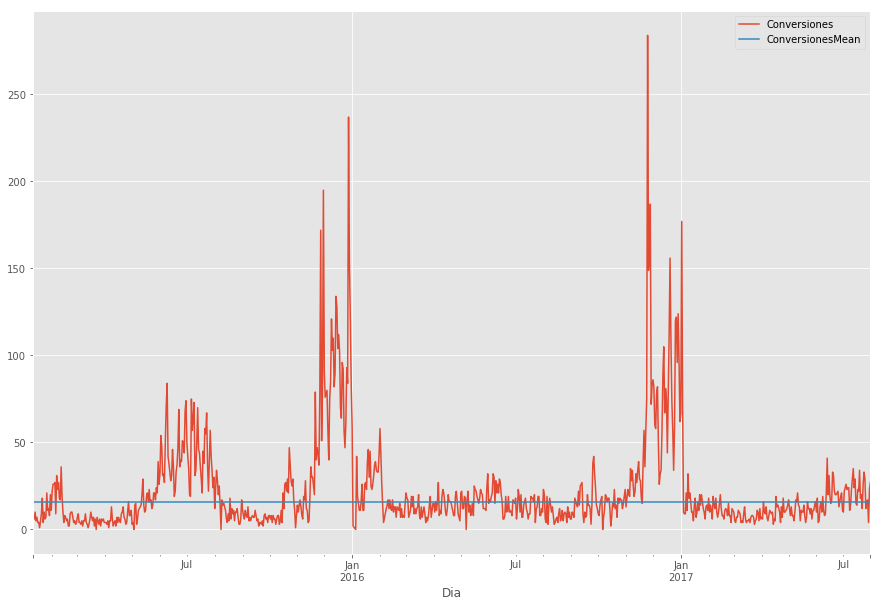

In [23]:
train1.plot(kind="line", x="Dia", y = ["Conversiones", "ConversionesMean"])

Utilizaremos Root Mean Square Error (RMSE) para calcular sus valores de error.

$RMSE = \Sigma \sqrt{ (\hat{y} - y)^2/n} $ , donde $\hat{y}$ es el valor predicho de y

In [24]:
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [25]:
model_mean_RMSE = RMSE(train1.ConversionesMean, train1.Conversiones)
model_mean_RMSE

28.629532259842083

In [26]:
# Guardamos esto en un dataframe
train1Results = pd.DataFrame(columns = ["Model", "Forecast", "RMSE"])
train1Results.head()

,Model,Forecast,RMSE


In [27]:
train1Results.loc[0,"Model"] = "Mean"
train1Results.loc[0,"Forecast"] = np.exp(model_mean_pred)
train1Results.loc[0,"RMSE"] = model_mean_RMSE
train1Results.head()

,Model,Forecast,RMSE
0,Mean,15.6749,28.6295


#### Linear Trend Model
Haremos un modelo de tendencia lineal entre ConversionesLog y Dia.
Sin embargo, para hacer una regresión lineal, necesitamos un indicador numérico para la variable 'Dia' (Fecha). Crearemos este indicador.

In [28]:
train1.head()

,Dia,Conversiones,Coste,ConversionesLog,ConversionesMean
Dia,,,,,
2015-01-11,2015-01-11,6.0,92.36,1.945910,15.674942
2015-01-12,2015-01-12,6.0,89.62,1.945910,15.674942
2015-01-13,2015-01-13,10.0,101.76,2.397895,15.674942
2015-01-14,2015-01-14,5.0,111.02,1.791759,15.674942
2015-01-15,2015-01-15,7.0,102.51,2.079442,15.674942


In [29]:
train1.dtypes

Dia                 datetime64[ns]
Conversiones               float64
Coste                      float64
ConversionesLog            float64
ConversionesMean           float64
dtype: object

In [30]:
# Vemos en qué mes empiezan nuestras fechas
mindia = train1.Dia.min()
mindia

Timestamp('2015-01-11 00:00:00')

In [31]:
# Creamos el indice de tiempo
train1["timeIndex"] = train1.Dia - train1.Dia.min()

C:\Users\usuario\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
train1.head()

,Dia,Conversiones,Coste,ConversionesLog,ConversionesMean,timeIndex
Dia,,,,,,
2015-01-11,2015-01-11,6.0,92.36,1.945910,15.674942,0 days
2015-01-12,2015-01-12,6.0,89.62,1.945910,15.674942,1 days
2015-01-13,2015-01-13,10.0,101.76,2.397895,15.674942,2 days
2015-01-14,2015-01-14,5.0,111.02,1.791759,15.674942,3 days
2015-01-15,2015-01-15,7.0,102.51,2.079442,15.674942,4 days


In [33]:
# Convertimos a días en formato numérico utilizando la funcion timedelta.
train1["timeIndex"] =  train1["timeIndex"]/np.timedelta64(1, 'D')

C:\Users\usuario\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
train1.head()

,Dia,Conversiones,Coste,ConversionesLog,ConversionesMean,timeIndex
Dia,,,,,,
2015-01-11,2015-01-11,6.0,92.36,1.945910,15.674942,0.0
2015-01-12,2015-01-12,6.0,89.62,1.945910,15.674942,1.0
2015-01-13,2015-01-13,10.0,101.76,2.397895,15.674942,2.0
2015-01-14,2015-01-14,5.0,111.02,1.791759,15.674942,3.0
2015-01-15,2015-01-15,7.0,102.51,2.079442,15.674942,4.0


In [36]:
# Convertimos 'timeIndex' a entero
train1["timeIndex"] = train1["timeIndex"].astype(int)

C:\Users\usuario\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
train1.head()

,Dia,Conversiones,Coste,ConversionesLog,ConversionesMean,timeIndex
Dia,,,,,,
2015-01-11,2015-01-11,6.0,92.36,1.945910,15.674942,0
2015-01-12,2015-01-12,6.0,89.62,1.945910,15.674942,1
2015-01-13,2015-01-13,10.0,101.76,2.397895,15.674942,2
2015-01-14,2015-01-14,5.0,111.02,1.791759,15.674942,3
2015-01-15,2015-01-15,7.0,102.51,2.079442,15.674942,4


In [38]:
model_linear = smf.ols('ConversionesLog ~ timeIndex', data = train1).fit()

In [39]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ConversionesLog   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     7.060
Date:                Mon, 13 Nov 2017   Prob (F-statistic):            0.00802
Time:                        20:24:02   Log-Likelihood:                -1177.1
No. Observations:                 933   AIC:                             2358.
Df Residuals:                     931   BIC:                             2368.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6233      0.056     46.877      0.000       2.513       2.733
timeIndex      0.0003      0.000      2.657      0.008    7.22e-05       0.000
==============================================================================
Omnibus:                       26.520   Durbin-Watson:                   0.459
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.640
Skew:                           0.352   Prob(JB):                     2.22e-07
Kurtosis:                       3.542   Cond. No.                     1.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
## Parametros para y = mx + c
model_linear.params

Intercept    2.623323
timeIndex    0.000276
dtype: float64

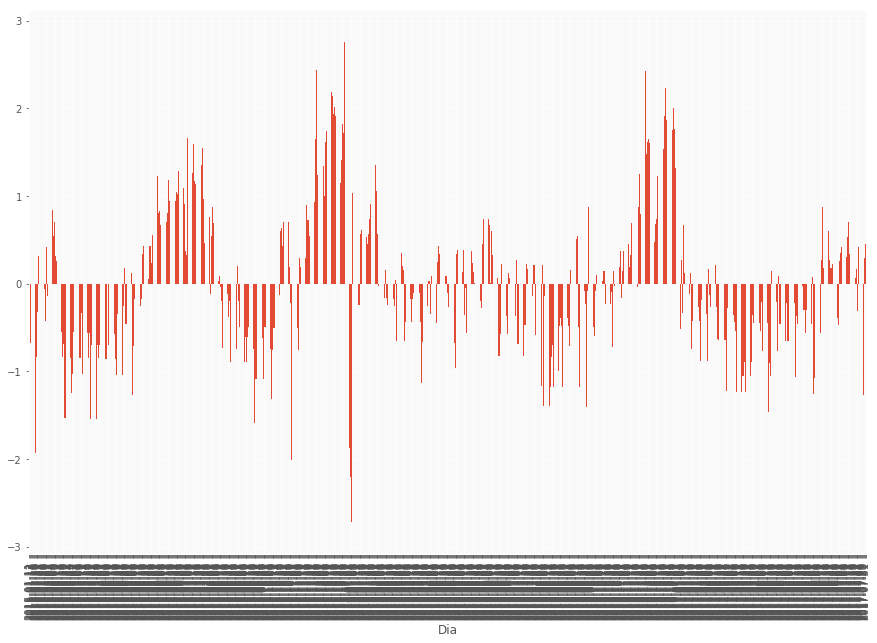

In [41]:
model_linear.resid.plot(kind = "bar")

¿Es este un buen modelo?
Evidentemente NO. Seguiremos probando nuevos modelos


In [42]:
m = model_linear.params[1]
m

0.00027626801147077179

In [43]:
c = model_linear.params[0]
c

2.6233225097244528

In [44]:
# Cálculo manual. Elegimos 85 al azar para obtener un resultado. Podríamos escoger cualquier número porque el resultado será similar.
model_linear_forecast_manual = m * 85 + c
model_linear_forecast_manual

2.6468052906994686

In [45]:
model_linear_pred = model_linear.predict()

In [46]:
model_linear_pred

array([ 2.62332251,  2.62359878,  2.62387505,  2.62415131,  2.62442758,
        2.62470385,  2.62498012,  2.62525639,  2.62553265,  2.62580892,
        2.62608519,  2.62636146,  2.62663773,  2.62691399,  2.62719026,
        2.62746653,  2.6277428 ,  2.62801907,  2.62829533,  2.6285716 ,
        2.62884787,  2.62912414,  2.62940041,  2.62967667,  2.62995294,
        2.63022921,  2.63050548,  2.63078175,  2.63105801,  2.63133428,
        2.63161055,  2.63188682,  2.63216309,  2.63243935,  2.63271562,
        2.63299189,  2.63326816,  2.63354443,  2.63382069,  2.63409696,
        2.63437323,  2.6346495 ,  2.63492577,  2.63520203,  2.6354783 ,
        2.63575457,  2.63603084,  2.63630711,  2.63658337,  2.63685964,
        2.63713591,  2.63741218,  2.63768845,  2.63796471,  2.63824098,
        2.63851725,  2.63879352,  2.63906979,  2.63934605,  2.63962232,
        2.63989859,  2.64017486,  2.64045113,  2.64072739,  2.64100366,
        2.64127993,  2.6415562 ,  2.64183247,  2.64210873,  2.64

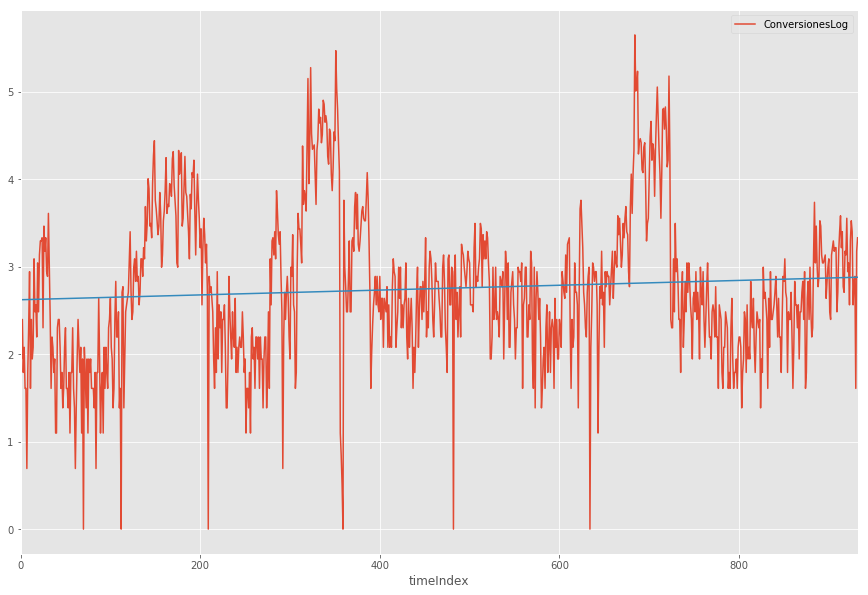

In [47]:
# Dibujamos la línea de predicción.
train1.plot(kind="line", x="timeIndex", y = "ConversionesLog")
plt.plot(train1.timeIndex,model_linear_pred, '-')

In [48]:
train1["ConversionesLinear"] = np.exp(model_linear_pred)

C:\Users\usuario\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
train1.head()

,Dia,Conversiones,Coste,ConversionesLog,ConversionesMean,timeIndex,ConversionesLinear
Dia,,,,,,,
2015-01-11,2015-01-11,6.0,92.36,1.945910,15.674942,0,13.781437
2015-01-12,2015-01-12,6.0,89.62,1.945910,15.674942,1,13.785244
2015-01-13,2015-01-13,10.0,101.76,2.397895,15.674942,2,13.789053
2015-01-14,2015-01-14,5.0,111.02,1.791759,15.674942,3,13.792863
2015-01-15,2015-01-15,7.0,102.51,2.079442,15.674942,4,13.796674


In [50]:
# Root Mean Squared Error (RMSE)
model_linear_RMSE = RMSE(train1.ConversionesLinear, train1.Conversiones)
model_linear_RMSE

28.632189846843666

In [51]:
train1Results.loc[1,"Model"] = "Linear"
train1Results.loc[1,"Forecast"] = np.exp(model_linear_forecast_manual)
train1Results.loc[1,"RMSE"] = model_linear_RMSE
train1Results.head()

,Model,Forecast,RMSE
0,Mean,15.6749,28.6295
1,Linear,14.1089,28.6322


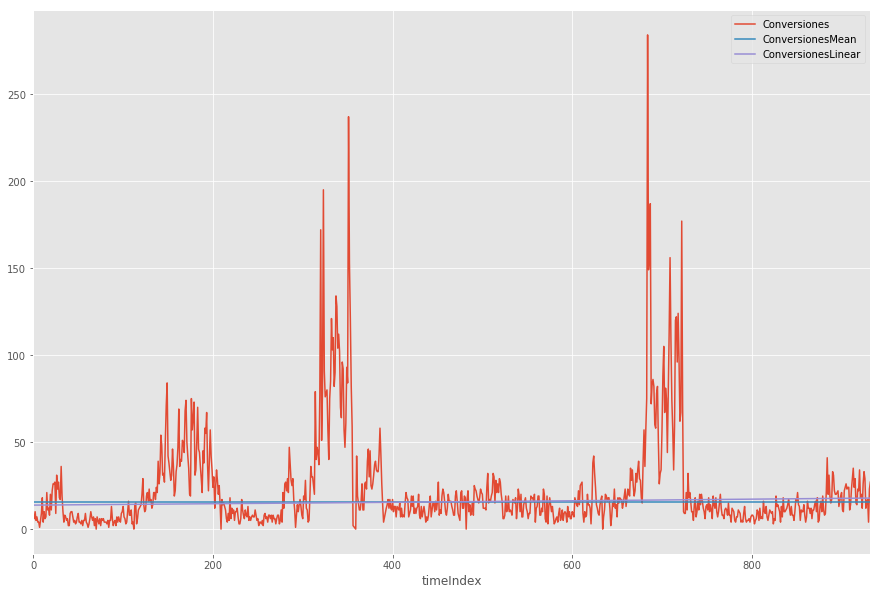

In [52]:
train1.plot(kind="line", x="timeIndex", y = ["Conversiones", "ConversionesMean", "ConversionesLinear"])

#### Linear Model with Regressor

In [53]:
# Calculamos ahora el modelo de Regresion incluyendo la varible 'Coste' en el modelo.
model_linear_coste = smf.ols('ConversionesLog ~ timeIndex + np.log(Coste)', data = train1).fit()

Es evidente que en este modelo para predecir las conversiones de un día futuro sería necesario tener los datos del Coste. Es imposible saber el coste exacto de una campaña en el futuro pero se podría sustituir por el presupuesto destinado para el día de predicción.

In [54]:
model_linear_coste.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ConversionesLog   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     1005.
Date:                Mon, 13 Nov 2017   Prob (F-statistic):          3.69e-233
Time:                        20:38:31   Log-Likelihood:                -643.71
No. Observations:                 933   AIC:                             1293.
Df Residuals:                     930   BIC:                             1308.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.3671      0.095    -14.402      0.000      -1.553      -1.181
timeIndex         0.0006   5.91e-05      9.419      0.000       0.000       0.001
np.log(Coste)     0.7752      0.017     44.585      0.000       0.741       0.809
==============================================================================
Omnibus:                       39.406   Durbin-Watson:                   1.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.143
Skew:                          -0.366   Prob(JB):                     1.44e-13
Kurtosis:                       3.993   Cond. No.                     3.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
train1["ConversionesLinearCoste"] = np.exp(model_linear_coste.predict())

C:\Users\usuario\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


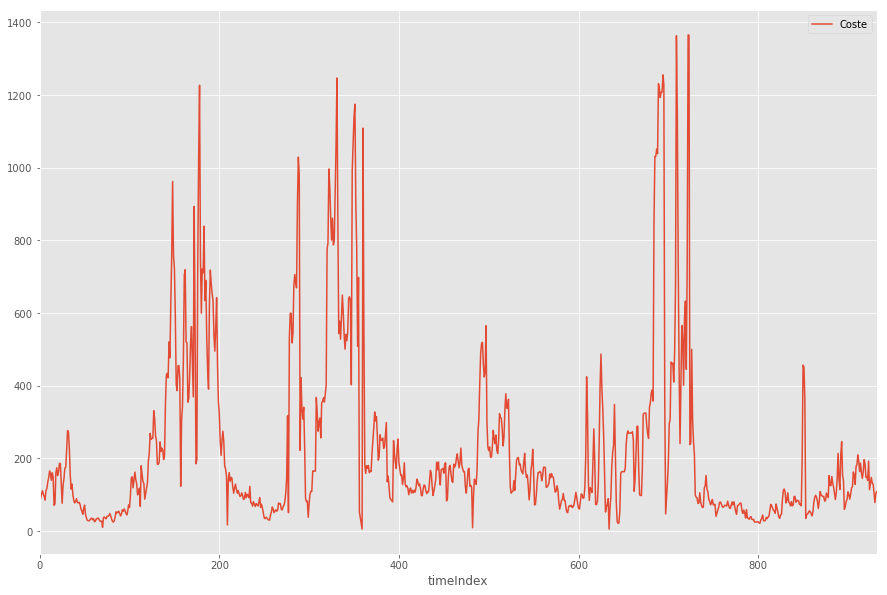

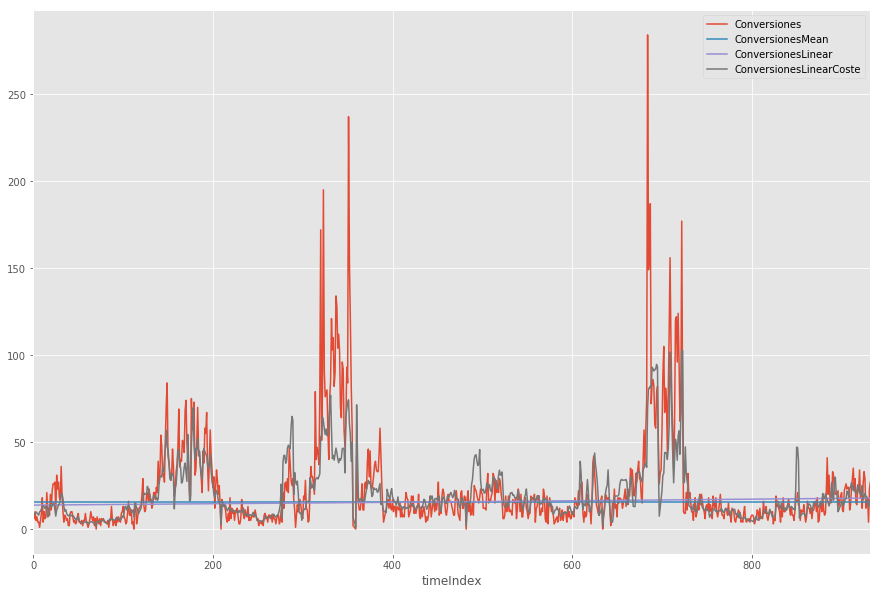

In [56]:
train1.plot(kind = "line", x="timeIndex", y = "Coste")
train1.plot(kind="line", x="timeIndex", y = ["Conversiones", "ConversionesMean", 
                                             "ConversionesLinear", "ConversionesLinearCoste"])

#### Random Walk Model
Nos enfrentamos a una serie temporal que muestra un crecimiento irregular y la mejor estrategia puede no ser tratar de predecir directamente la serie en cada período (es decir, la cantidad Yt). Puede ser mejor tratar de predecir el cambio que ocurre de un período al siguiente (es decir, la cantidad Yt - Yt-1). A los efectos del pronóstico de un período por delante, es tan bueno predecir el próximo cambio como predecir el siguiente nivel de la serie, ya que el cambio predicho puede agregarse al nivel actual para producir un nivel predicho. El caso más simple de dicho modelo es uno que siempre predice que el siguiente cambio será cero, como si la serie tuviera la misma probabilidad de subir o bajar en el próximo período independientemente de lo que haya hecho en el pasado.
Random Walk Model $$ \ {Y_t} = Y_ {t-1} + \ epsilon \\ $$
Random Walk Model con desplazamiento $$ \ {Y_t} = Y_ {t-1} + c + \ epsilon \\ $$

In [57]:
train1["ConversionesLogShift1"] = train1.ConversionesLog.shift()

C:\Users\usuario\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
train1.head()

,Dia,Conversiones,Coste,ConversionesLog,ConversionesMean,timeIndex,ConversionesLinear,ConversionesLinearCoste,ConversionesLogShift1
Dia,,,,,,,,,
2015-01-11,2015-01-11,6.0,92.36,1.945910,15.674942,0,13.781437,8.509343,NaN
2015-01-12,2015-01-12,6.0,89.62,1.945910,15.674942,1,13.785244,8.317620,1.945910
2015-01-13,2015-01-13,10.0,101.76,2.397895,15.674942,2,13.789053,9.183515,1.945910
2015-01-14,2015-01-14,5.0,111.02,1.791759,15.674942,3,13.792863,9.830394,2.397895
2015-01-15,2015-01-15,7.0,102.51,2.079442,15.674942,4,13.796674,9.246221,1.791759


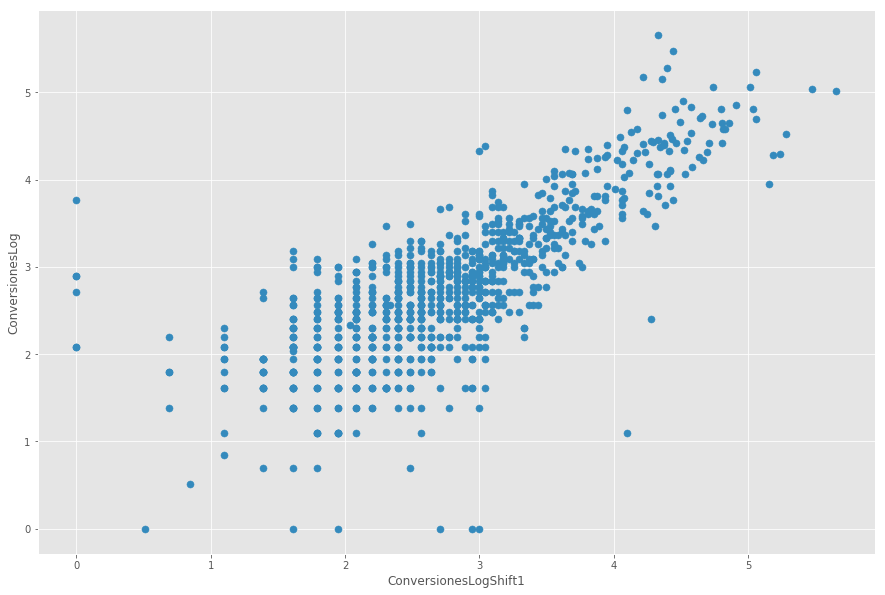

In [59]:
train1.plot(kind= "scatter", y = "ConversionesLog", x = "ConversionesLogShift1", s = 50)

Como era de esperar, observamos que existe una correlación positiva entre las conversiones de dos días consecutivos. 

In [60]:
# Ploteamos la curva de diferencia de un día.
train1["ConversionesLogDiff"] = train1.ConversionesLog - train1.ConversionesLogShift1

C:\Users\usuario\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


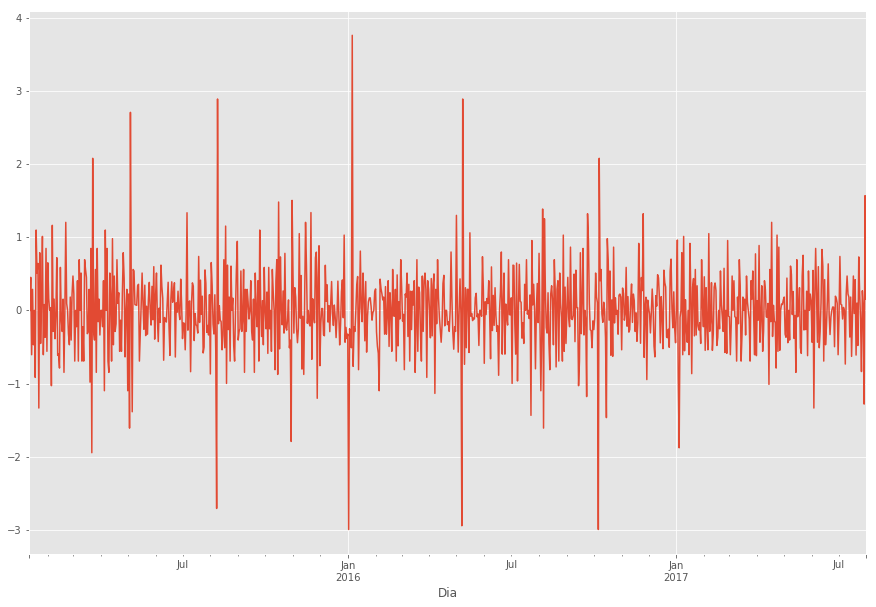

In [61]:
train1.ConversionesLogDiff.plot()

In [62]:
train1["ConversionesRandom"] = np.exp(train1.ConversionesLogShift1)
train1.head()

C:\Users\usuario\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Dia,Conversiones,Coste,ConversionesLog,ConversionesMean,timeIndex,ConversionesLinear,ConversionesLinearCoste,ConversionesLogShift1,ConversionesLogDiff,ConversionesRandom
Dia,,,,,,,,,,,
2015-01-11,2015-01-11,6.0,92.36,1.945910,15.674942,0,13.781437,8.509343,NaN,NaN,NaN
2015-01-12,2015-01-12,6.0,89.62,1.945910,15.674942,1,13.785244,8.317620,1.945910,0.000000,7.0
2015-01-13,2015-01-13,10.0,101.76,2.397895,15.674942,2,13.789053,9.183515,1.945910,0.451985,7.0
2015-01-14,2015-01-14,5.0,111.02,1.791759,15.674942,3,13.792863,9.830394,2.397895,-0.606136,11.0
2015-01-15,2015-01-15,7.0,102.51,2.079442,15.674942,4,13.796674,9.246221,1.791759,0.287682,6.0


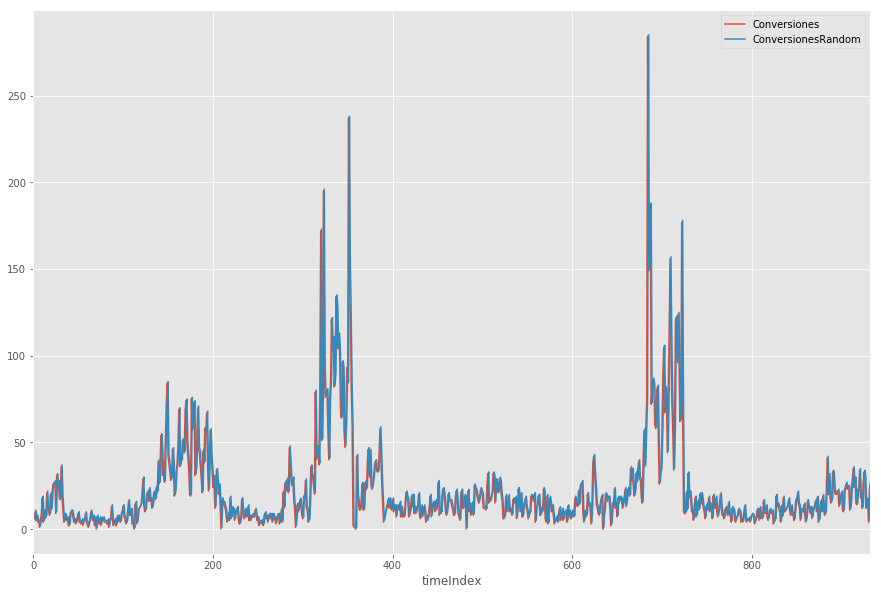

In [63]:
train1.plot(kind="line", x="timeIndex", y = ["Conversiones","ConversionesRandom"])

In [64]:
# Root Mean Squared Error (RMSE)
model_random_RMSE = RMSE(train1.ConversionesRandom, train1.Conversiones)
model_random_RMSE

17.669645739052996

In [65]:
train1Results.loc[2,"Model"] = "Random"
train1Results.loc[2,"Forecast"] = np.exp(train1.ConversionesLogShift1[-1])
train1Results.loc[2,"RMSE"] = model_random_RMSE
train1Results.head()

,Model,Forecast,RMSE
0,Mean,15.6749,28.6295
1,Linear,14.1089,28.6322
2,Random,24,17.6696


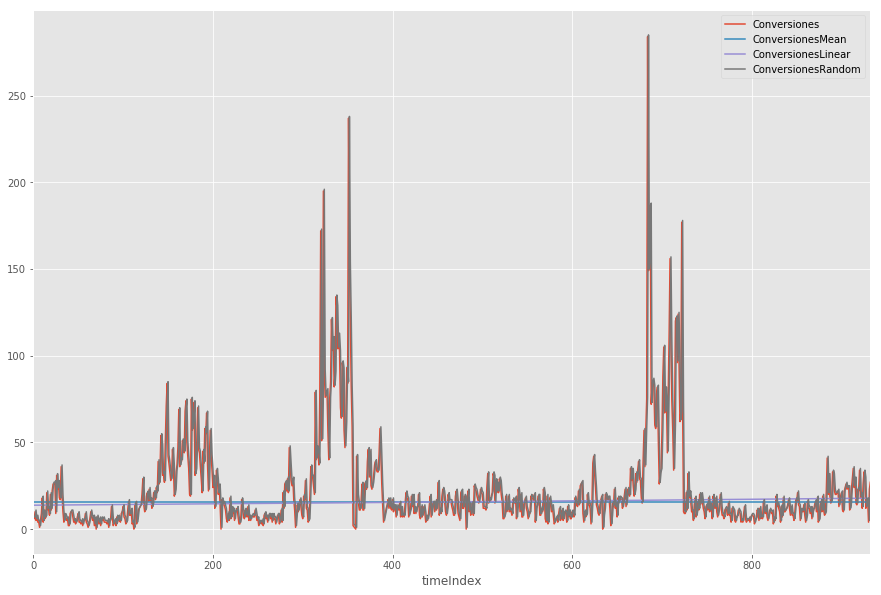

In [66]:
train1.plot(kind="line", x="timeIndex", y = ["Conversiones", "ConversionesMean", "ConversionesLinear", "ConversionesRandom"])

### Modelo avanzado
La mayoría de los modelos de series temporles funcionan bajo el supuesto de que la serie temporal es estacionaria. Intuitivamente, podemos ver que si una serie de tiempo tiene un comportamiento particular a lo largo del tiempo, existe una gran probabilidad de que siga igual en el futuro. Además, las teorías relacionadas con las series estacionarias son más maduras y más fáciles de implementar que las series no estacionarias.

Hay tres criterios básicos para que una serie se clasifique como serie estacionaria:
- La media de la serie no debe ser una función del tiempo sino una constante.
- La varianza de la serie no debe ser una función del tiempo. Esta propiedad se conoce como homoscedasticidad.
- La covarianza del primer término y el término (i + m) no deberían ser una función del tiempo.

¿Cómo verificamos estacionariedad en una serie?
- Trazado de estadísticas continuas: podemos trazar la media móvil o la varianza en movimiento y ver si varía con el tiempo. Al mover el promedio / varianza quiere decir que en cualquier instante 't', tomaremos el promedio / varianza de la última semana, es decir, los últimos 7 días. Pero, nuevamente, esto es más una técnica visual.
- Prueba Dickey-Fuller: esta es una de las pruebas estadísticas para verificar la estacionariedad. Aquí la hipótesis nula es que la serie temporal no es estacionaria. Los resultados de la prueba comprenden una Estadística de prueba y algunos Valores críticos para niveles de confianza diferenciados. Si la 'Estadística de prueba' es menor que el 'Valor crítico', podemos rechazar la hipótesis nula y decir que la serie es estacionaria.

#### Prueba aumentada Dickey Fuller de estacionariedad
La prueba de Dickey-Fuller aumentada se puede utilizar para probar una raíz unitaria en un proceso univariante en presencia de correlación serial.
$$ Y_t = \ rho * Y_ {t-1} + \ epsilon_t \\ $$$$ Y_t - Y_ {t-1} = (\ rho - 1) Y_ {t - 1} + \ epsilon_t \\ $$
Tenemos que probar si p - 1 es significativamente diferente de cero o no. Si la hipótesis nula es rechazada, obtendremos una serie temporal estacionaria.

In [67]:
def adf(ts):
    
    # Determing rolling statistics
    rolmean = pd.rolling_mean(ts, window=7)
    rolstd = pd.rolling_std(ts, window=7)

    #Plot rolling statistics:
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Calculate ADF factors
    adftest = adfuller(ts, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','# of Lags Used',
                                              'Number of Observations Used'])
    for key,value in adftest[4].items():
        adfoutput['Critical Value (%s)'%key] = value
    return adfoutput

#### ¿Cómo hacer una serie de tiempo sea estacionaria?
Hay 3 razones principales detrás de la no estacionariedad:
- Tendencia: existe una tendencia cuando hay un aumento o disminución a largo plazo en los datos. No tiene porqué que ser lineal.
- Estacional: existe un patrón estacional cuando una serie está influenciada por factores estacionales (por ejemplo, el trimestre del año, el mes o el día de la semana). La estacionalidad es siempre de un período fijo y conocido.
- Cíclico: existe un patrón cíclico cuando los datos exhibidos suben y bajan que no son de período fijo. 
$$ y_t = S_t + T_t + E_t \\ $$
donde $ y_t $ son los datos en el período t, $ S_t $ es el componente estacional en el período 't', $ T_t $ es el componente del ciclo de tendencia en el período t y $ E_t $ es el componente restante (o irregular o error) en el período t.

El modelo aditivo es más apropiado si la magnitud de las fluctuaciones estacionales o la variación en torno al ciclo de tendencia no varía con el nivel de la serie temporal. Cuando la variación en el patrón estacional, o la variación alrededor del ciclo de tendencia, parece ser proporcional al nivel de la serie temporal, entonces un modelo multiplicativo es más apropiado. 

Una alternativa al uso de un modelo multiplicativo es transformar primero los datos hasta que la variación en la serie parezca estable a lo largo del tiempo y luego usar un modelo aditivo. Cuando se ha utilizado una transformación de registro, esto es equivalente a usar una descomposición multiplicativa porque
$$ log y_t = log S_t + log T_t + log E_t \\ $$

#### Estimar y eliminar la tendencia
- Transformación: realizar una transformación de registro, sqrt, cuberoot, etc.
- Agregación - tomando promedio por un período de tiempo como promedios mensuales / semanales
- Suavizado: tomando promedios variables, suavizado exponencial
- Colocación polinómica: se ajusta a un modelo de regresión

#### Promedio móvil simple
Como primer paso para ir más allá de los modelos medios, los modelos de tendencia aleatoria y los modelos de tendencia lineal, los patrones y tendencias no estacionales se pueden extrapolar utilizando un modelo de promedio móvil o suavizado. Tomamos un promedio móvil (local) para estimar el valor actual de la media y luego lo usamos como pronóstico para el futuro cercano. 
La misma estrategia se puede usar para estimar y extrapolar una tendencia local. 

Promedio móvil simple (SMA)
$$ \ {y_t} = \ {y_ {t-1} + y_ {t-2} + y_ {t-3} + ... + y_ {t-m}} {m} \\ $$


In [68]:
# Suavizamos valores utilizando las medias móviles de 7 días. 
train1['ConversionesLogMA7'] = pd.rolling_mean(train1.ConversionesLog, window = 7)

C:\Users\usuario\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  
C:\Users\usuario\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


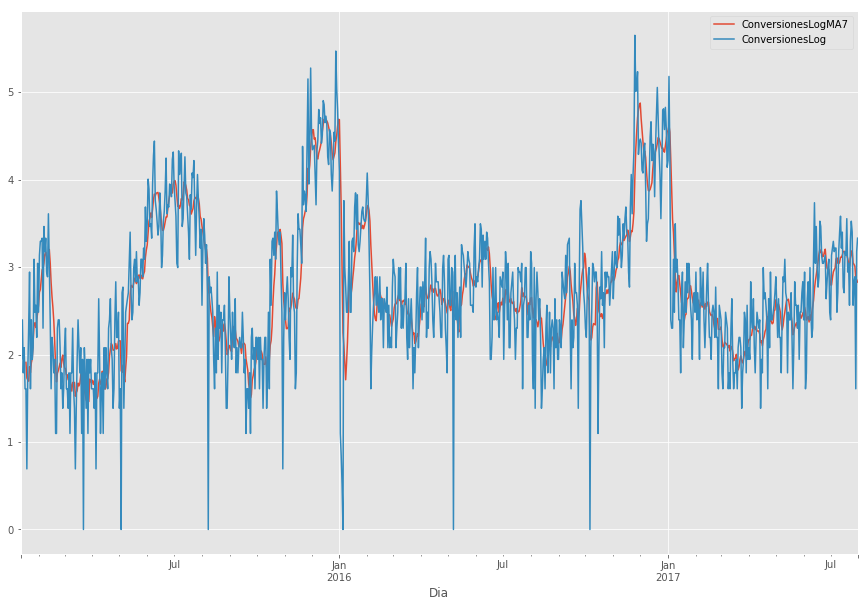

In [69]:
train1.plot(kind ="line", y=["ConversionesLogMA7", "ConversionesLog"])

In [70]:
train1["ConversionesMA7"] = np.exp(train1.ConversionesLogMA7)
train1.tail()

C:\Users\usuario\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Dia,Conversiones,Coste,ConversionesLog,ConversionesMean,timeIndex,ConversionesLinear,ConversionesLinearCoste,ConversionesLogShift1,ConversionesLogDiff,ConversionesRandom,ConversionesLogMA7,ConversionesMA7
Dia,,,,,,,,,,,,,
2017-07-27,2017-07-27,16.0,129.75,2.833213,15.674942,928,17.808916,18.558436,2.564949,0.268264,13.0,3.033004,20.759504
2017-07-28,2017-07-28,17.0,106.75,2.890372,15.674942,929,17.813837,15.962277,2.833213,0.057158,17.0,3.010983,20.307345
2017-07-29,2017-07-29,4.0,78.50,1.609438,15.674942,930,17.818759,12.584954,2.890372,-1.280934,18.0,2.874481,17.716227
2017-07-30,2017-07-30,23.0,102.26,3.178054,15.674942,931,17.823682,15.456516,1.609438,1.568616,5.0,2.857655,17.420625
2017-07-31,2017-07-31,27.0,108.50,3.332205,15.674942,932,17.828607,16.191752,3.178054,0.154151,24.0,2.829918,16.944076


In [71]:
model_MA7_forecast = train1.ConversionesLog.tail(7).mean()

In [73]:
# Root Mean Squared Error (RMSE)
model_MA7_RMSE = RMSE(train1.ConversionesMA7, train1.Conversiones)
model_MA7_RMSE

16.063793290492949

In [74]:
train1Results.loc[3,"Model"] = "Moving Average 7"
train1Results.loc[3,"Forecast"] = np.exp(model_MA7_forecast)
train1Results.loc[3,"RMSE"] = model_MA7_RMSE
train1Results.head()

,Model,Forecast,RMSE
0,Mean,15.6749,28.6295
1,Linear,14.1089,28.6322
2,Random,24,17.6696
3,Moving Average 7,16.9441,16.0638


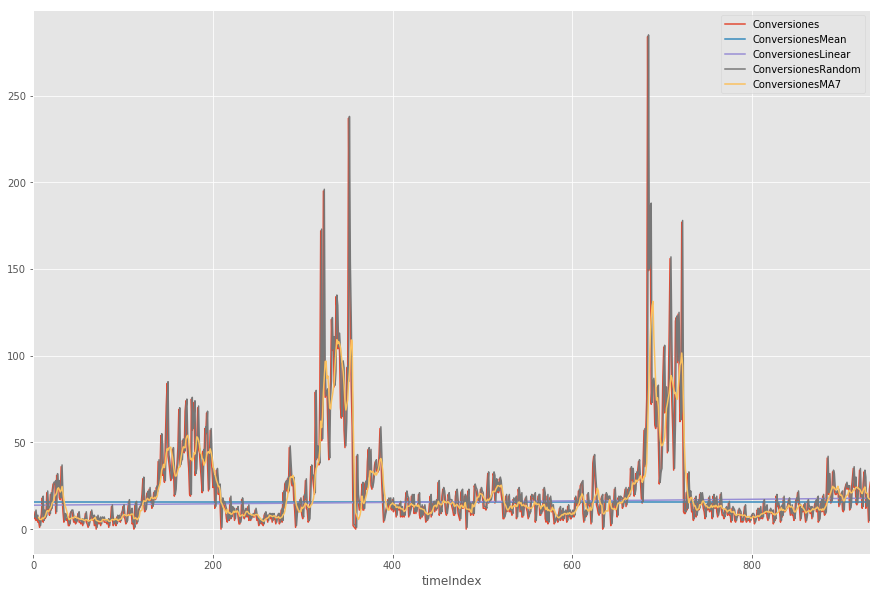

In [75]:
train1.plot(kind="line", x="timeIndex", y = ["Conversiones", "ConversionesMean", "ConversionesLinear",
                                             "ConversionesRandom", "ConversionesMA7"])

#### Modelo de suavizado exponencial simple (SES)
En lugar de ponderar cada una de las observaciones por igual, en el modelo SES damos más peso a las observaciones recientes y menos a las anteriores. Esto se hace mediante el uso de una variable de suavizado como alfa
$$ \ {y_t} = \ alpha y_ {t-1} + (1- \ alpha) \ {y_ {t-1}} \\ $$

In [76]:
train1['ConversionesLogExp7'] = pd.ewma(train1.ConversionesLog, halflife=7)

C:\Users\usuario\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=7,ignore_na=False,min_periods=0,adjust=True).mean()
  """Entry point for launching an IPython kernel.
C:\Users\usuario\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [77]:
halflife = 7
alpha = 1 - np.exp(np.log(0.5)/halflife)
alpha

0.094276335736093286

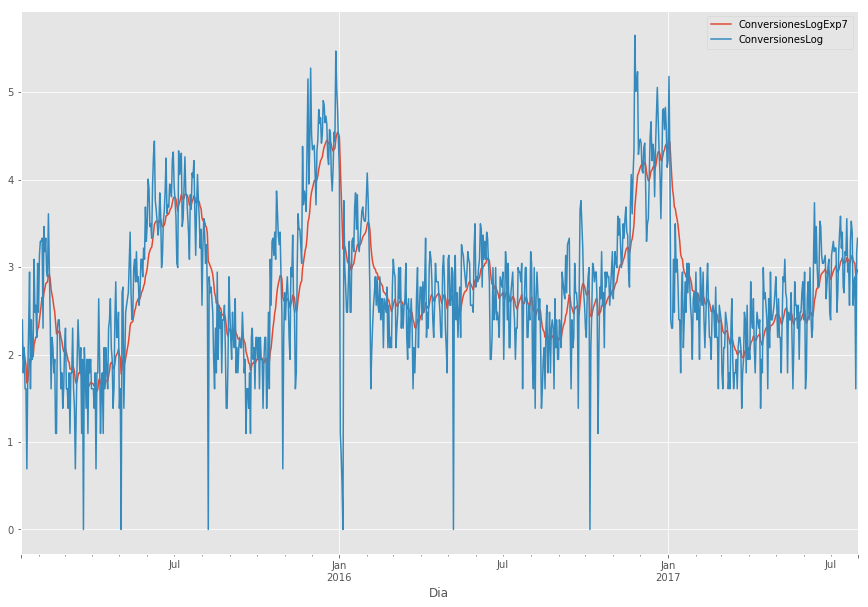

In [78]:
train1.plot(kind ="line", y=["ConversionesLogExp7", "ConversionesLog"])

In [79]:
train1["ConversionesExp7"] = np.exp(train1.ConversionesLogExp7)
train1.tail()

C:\Users\usuario\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Dia,Conversiones,Coste,ConversionesLog,ConversionesMean,timeIndex,ConversionesLinear,ConversionesLinearCoste,ConversionesLogShift1,ConversionesLogDiff,ConversionesRandom,ConversionesLogMA7,ConversionesMA7,ConversionesLogExp7,ConversionesExp7
Dia,,,,,,,,,,,,,,,
2017-07-27,2017-07-27,16.0,129.75,2.833213,15.674942,928,17.808916,18.558436,2.564949,0.268264,13.0,3.033004,20.759504,3.057458,21.273413
2017-07-28,2017-07-28,17.0,106.75,2.890372,15.674942,929,17.813837,15.962277,2.833213,0.057158,17.0,3.010983,20.307345,3.041706,20.940934
2017-07-29,2017-07-29,4.0,78.50,1.609438,15.674942,930,17.818759,12.584954,2.890372,-1.280934,18.0,2.874481,17.716227,2.906677,18.295897
2017-07-30,2017-07-30,23.0,102.26,3.178054,15.674942,931,17.823682,15.456516,1.609438,1.568616,5.0,2.857655,17.420625,2.932261,18.770026
2017-07-31,2017-07-31,27.0,108.50,3.332205,15.674942,932,17.828607,16.191752,3.178054,0.154151,24.0,2.829918,16.944076,2.969966,19.491266


In [80]:
# Root Mean Squared Error (RMSE)
model_Exp7_RMSE = RMSE(train1.ConversionesExp7, train1.Conversiones)
model_Exp7_RMSE

18.189162743689046

In [81]:
y_exp = train1.ConversionesLog[-1]
y_exp

3.3322045101752038

In [82]:
y_for = train1.ConversionesLogExp7[-1]
y_for

2.969966442900561

In [83]:
model_Exp7_forecast = alpha * y_exp + (1 - alpha) * y_for

In [84]:
train1Results.loc[4,"Model"] = "Exp Smoothing 7"
train1Results.loc[4,"Forecast"] = np.exp(model_Exp7_forecast)
train1Results.loc[4,"RMSE"] = model_Exp7_RMSE
train1Results.head()

,Model,Forecast,RMSE
0,Mean,15.6749,28.6295
1,Linear,14.1089,28.6322
2,Random,24,17.6696
3,Moving Average 7,16.9441,16.0638
4,Exp Smoothing 7,20.1684,18.1892


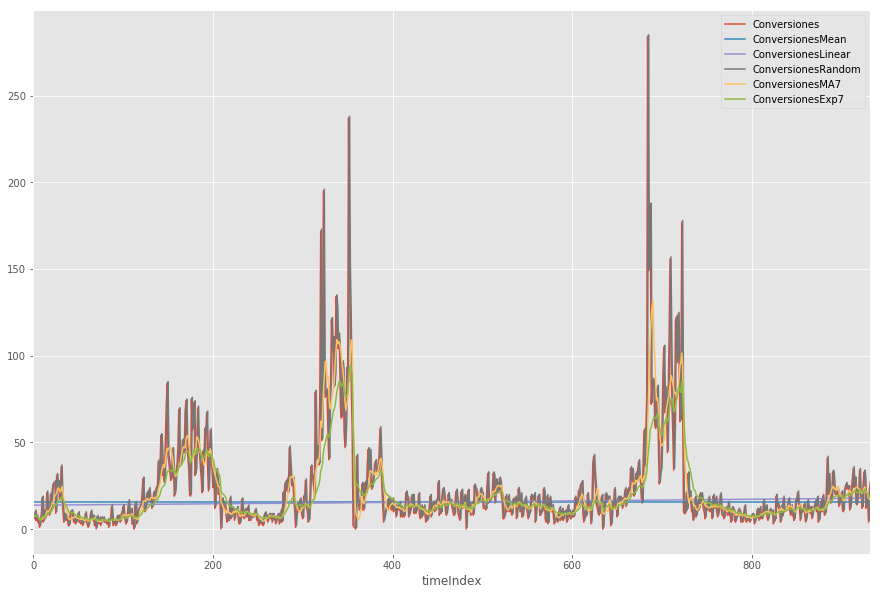

In [85]:
train1.plot(kind="line", x="timeIndex", y = ["Conversiones", "ConversionesMean", "ConversionesLinear", 
                                             "ConversionesRandom",
                                             "ConversionesMA7", "ConversionesExp7"])

#### Eliminando tendencia y estacionalidad
Uno de los métodos más comunes para lidiar tanto con la tendencia como con la estacionalidad es la diferenciación. En esta técnica, tomamos la diferencia de la observación en un instante particular con eso en el instante anterior. Esto en su mayoría funciona bien en la mejora de la estacionariedad. Ya hemos hecho la diferencia de primer orden antes

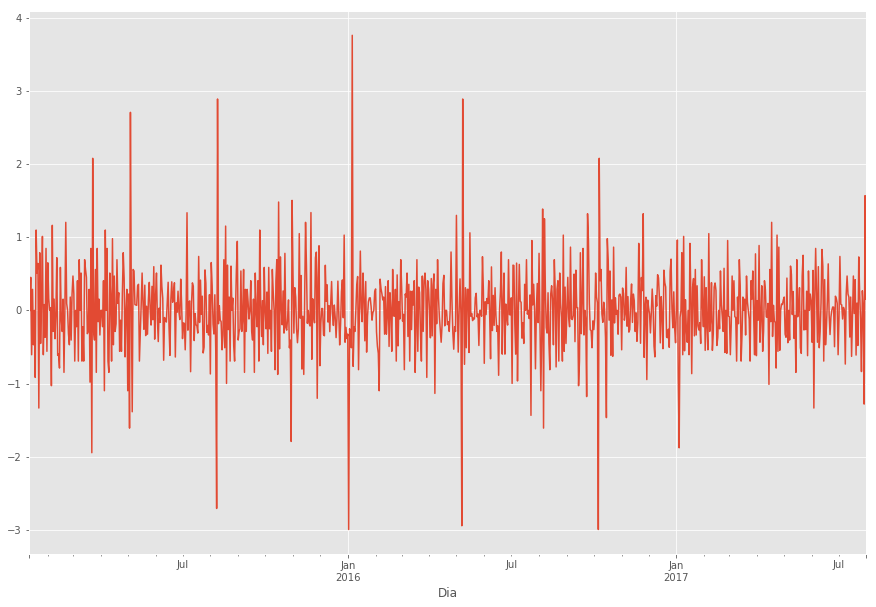

In [86]:
train1.ConversionesLogDiff.plot()

### Descomposición de series temporales
También podemos descomponer las series temporales en tendencia y estacionalidad

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [88]:
train1.index = train1.index.to_datetime()

C:\Users\usuario\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: to_datetime is deprecated. Use self.to_timestamp(...)
  """Entry point for launching an IPython kernel.


In [89]:
train1.head()

,Dia,Conversiones,Coste,ConversionesLog,ConversionesMean,timeIndex,ConversionesLinear,ConversionesLinearCoste,ConversionesLogShift1,ConversionesLogDiff,ConversionesRandom,ConversionesLogMA7,ConversionesMA7,ConversionesLogExp7,ConversionesExp7
Dia,,,,,,,,,,,,,,,
2015-01-11,2015-01-11,6.0,92.36,1.945910,15.674942,0,13.781437,8.509343,NaN,NaN,NaN,NaN,NaN,1.945910,7.000000
2015-01-12,2015-01-12,6.0,89.62,1.945910,15.674942,1,13.785244,8.317620,1.945910,0.000000,7.0,NaN,NaN,1.945910,7.000000
2015-01-13,2015-01-13,10.0,101.76,2.397895,15.674942,2,13.789053,9.183515,1.945910,0.451985,7.0,NaN,NaN,2.111712,8.262373
2015-01-14,2015-01-14,5.0,111.02,1.791759,15.674942,3,13.792863,9.830394,2.397895,-0.606136,11.0,NaN,NaN,2.019481,7.534417
2015-01-15,2015-01-15,7.0,102.51,2.079442,15.674942,4,13.796674,9.246221,1.791759,0.287682,6.0,NaN,NaN,2.033958,7.644279


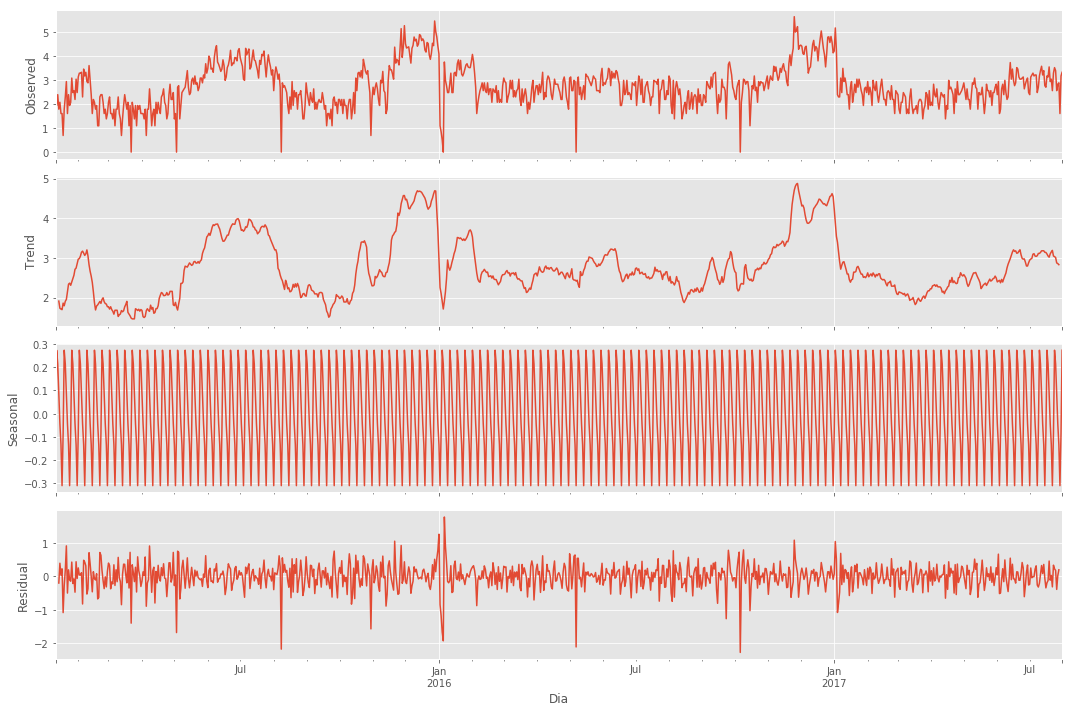

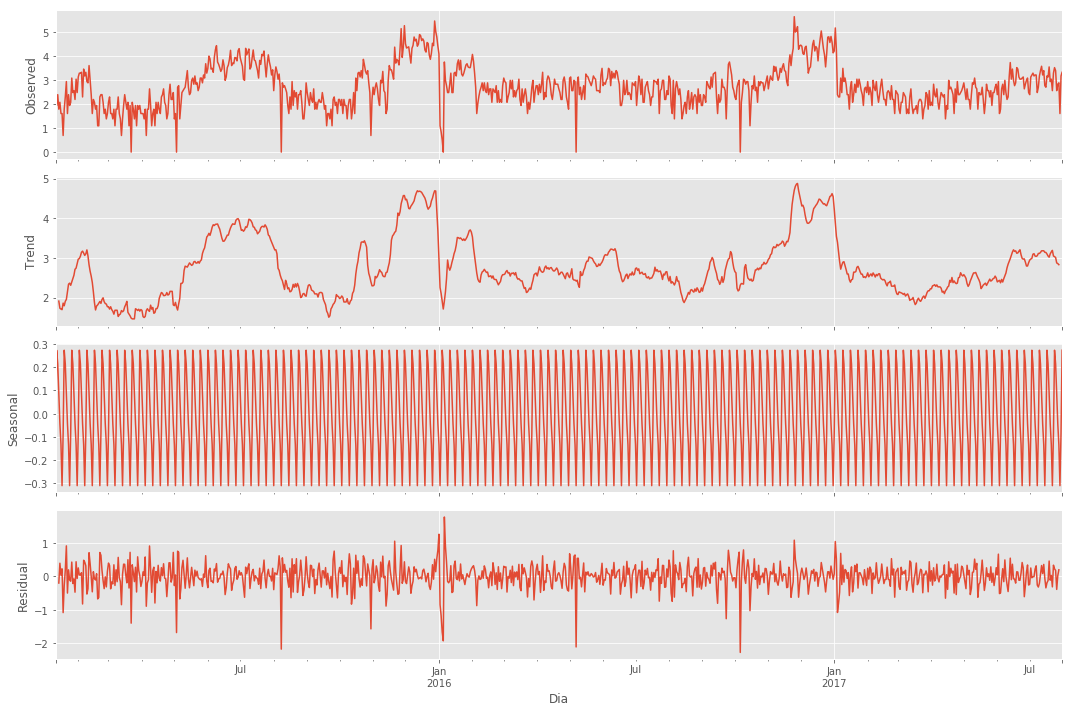

In [90]:
decomposition = seasonal_decompose(train1.ConversionesLog, model = "additive")
decomposition.plot()

In [91]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [92]:
train1["ConversionesDecomp"] = np.exp(trend + seasonal)

C:\Users\usuario\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
# Root Mean Squared Error (RMSE)
model_Decomp_RMSE = RMSE(train1.ConversionesDecomp, train1.Conversiones)
model_Decomp_RMSE

12.095145386397974

In [94]:
train1Results.loc[5,"Model"] = "Decomp"
train1Results.loc[5,"Forecast"] = ""
train1Results.loc[5,"RMSE"] = model_Decomp_RMSE
train1Results

,Model,Forecast,RMSE
0,Mean,15.6749,28.6295
1,Linear,14.1089,28.6322
2,Random,24,17.6696
3,Moving Average 7,16.9441,16.0638
4,Exp Smoothing 7,20.1684,18.1892
5,Decomp,,12.0951


C:\Users\usuario\Anaconda2\lib\site-packages\matplotlib\transforms.py:661: RuntimeWarning: invalid value encountered in absolute
  inside = ((abs(dx0 + dx1) + abs(dy0 + dy1)) == 0)


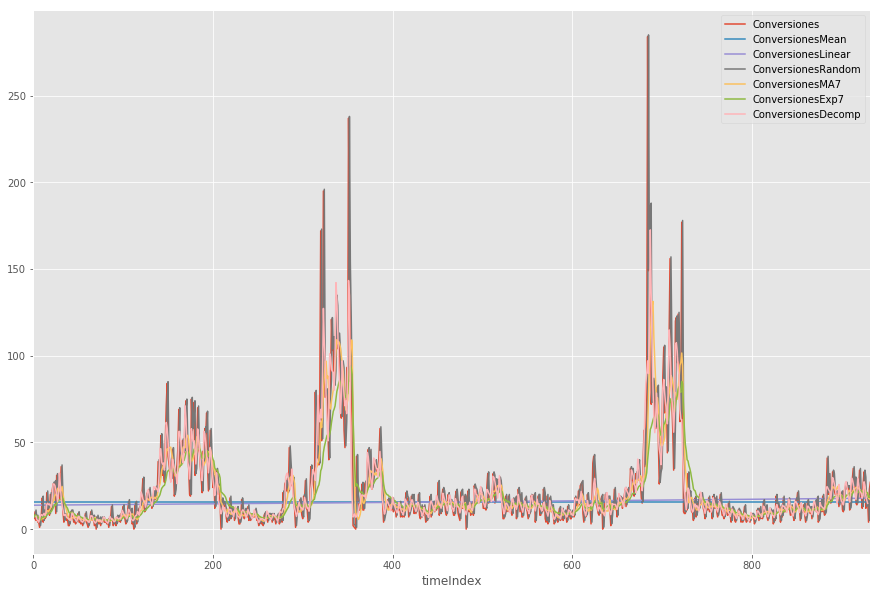

In [95]:
train1.plot(kind="line", x="timeIndex", y = ["Conversiones", "ConversionesMean", "ConversionesLinear", "ConversionesRandom",
                                             "ConversionesMA7", "ConversionesExp7", "ConversionesDecomp"])

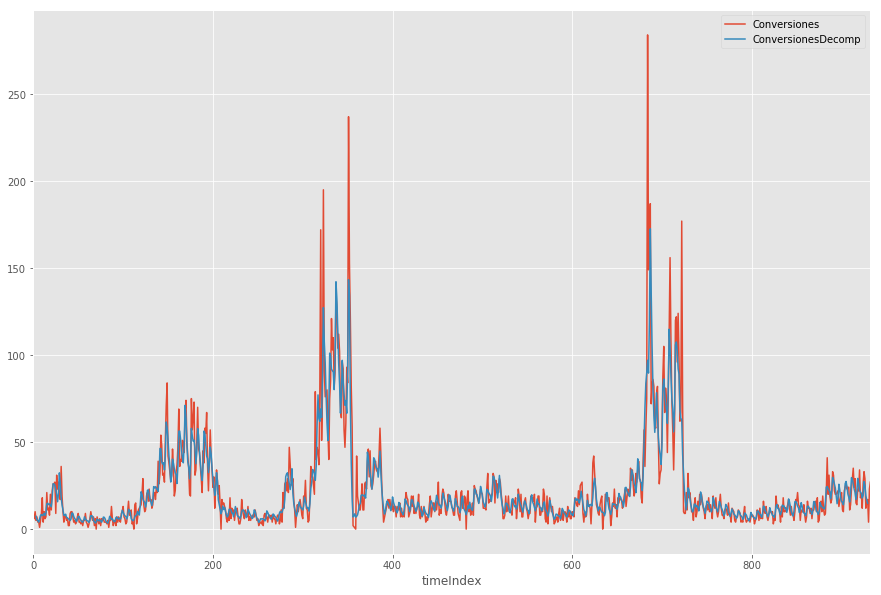

In [96]:
train1.plot(kind="line", x="timeIndex", y = ["Conversiones",
                                              "ConversionesDecomp"])

C:\Users\usuario\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  after removing the cwd from sys.path.
C:\Users\usuario\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  """


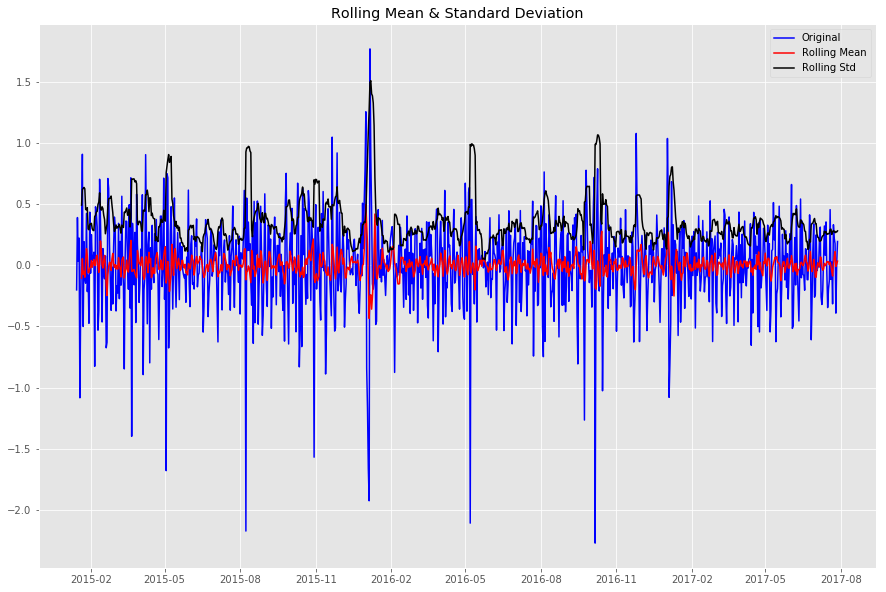

Test Statistic                -1.281961e+01
p-value                        6.193708e-24
# of Lags Used                 2.000000e+01
Number of Observations Used    9.060000e+02
Critical Value (5%)           -2.864735e+00
Critical Value (1%)           -3.437588e+00
Critical Value (10%)          -2.568471e+00
dtype: float64

In [97]:
# Test remaining part for Stationary
ts = decomposition.resid
ts.dropna(inplace = True)
adf(ts)

#### Modelos auto regresivos - AR (p)
En un modelo de autorregresión, pronosticamos la variable de interés utilizando una combinación lineal de valores pasados de la variable. El término autoregresión indica que es una regresión de la variable contra sí misma.

Por lo tanto, un modelo de orden autorregresivo (p) se puede escribir como
$$ y_t = c + m_1y_ {t-1} + m_2y_ {t-2} + m_3y_ {t-3} + .. \\ $$

El modelo de paseo aleatorio es un modelo AR (1) con $$ m_1 = 1, c = 0 \\ $$ 

#### Modelo de promedio móvil - MA (q)
En lugar de utilizar valores pasados de la variable de pronóstico en una regresión, un modelo de promedio móvil usa errores de pronóstico anteriores en un modelo similar a una regresión.
$$ y_t = c + e_t + l_1 e_ {t-1} + l_2 e_ {t-2} + ... + l_q e_ {t-q} \\ $$
donde e es ruido blanco. Nos referimos a esto como un modelo MA (q). Por supuesto, no observamos los valores de e (t), por lo que no es realmente regresión en el sentido habitual.

Observe que cada valor de y (t) se puede considerar como un promedio móvil ponderado de los últimos errores de pronóstico. Sin embargo, los modelos con promedio móvil no deben confundirse con el suavizado del promedio móvil. Se usa un modelo de promedio móvil para pronosticar valores futuros, mientras que el suavizado promedio móvil se usa para estimar el ciclo de tendencia de valores pasados.

#### Modelo ARIMA
Si combinamos la diferenciación con la autorregresión y un modelo de media móvil, obtenemos un modelo ARIMA no estacional.El modelo completo se puede escribir como
- Número de términos AR (autorregresivos) (p): los términos AR son solo rezagos de la variable dependiente. Por ejemplo, si p es 5, los predictores para y (t) serán y (t-1) ... .y (t-5).
- Número de términos MA (promedio móvil) (q): los términos MA son errores de pronóstico rezagados en la ecuación de predicción. Por ejemplo, si q es 5, los predictores para y (t) serán e (t-1) ... .e (t-5) donde e (i) es la diferencia entre el promedio móvil en el valor instantáneo y real.
- Número de diferencias (d): Estas son las diferencias no estacionales, es decir, en este caso tomamos la diferencia de primer orden. Entonces, o podemos pasar esa variable y poner d = 0 o pasar la variable original y poner d = 1. Ambos generarán los mismos resultados.

Una preocupación importante aquí es cómo determinar el valor de 'p' y 'q'. Usamos dos parcelas para determinar estos números. Vamos a discutirlos primero.
- Función de autocorrelación (ACF): es una medida de la correlación entre el TS con una versión retardada de sí mismo. Por ejemplo, en el desfase 5, ACF compararía series en el instante instante 't1' ... 't2' con series en el instante 't1-5' ... 't2-5' (siendo t1-5 y t2 puntos finales).
- Función de autocorrelación parcial (PACF): mide la correlación entre el TS con una versión rezagada de sí mismo pero después de eliminar las variaciones ya explicadas por las comparaciones intermedias. Por ejemplo, en el desfase 5, comprobará la correlación pero eliminará los efectos ya explicados por los rezagos 1 a 4.

En el modelo MA, el ruido / shock se desvanece rápidamente con el tiempo. El modelo AR tiene un efecto muy duradero del choque.

In [98]:
ts = train1.ConversionesLog
ts_diff = train1.ConversionesLogDiff
ts_diff.dropna(inplace = True)

C:\Users\usuario\Anaconda2\lib\site-packages\pandas\core\series.py:2726: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [99]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [100]:
lag_acf = acf(ts_diff, nlags=20)

In [101]:
lag_acf

array([  1.00000000e+00,  -3.19120939e-01,  -4.81855954e-02,
        -6.83761639e-02,  -7.60321695e-02,  -1.44531873e-02,
        -3.32287203e-04,   1.09148555e-01,  -1.25770023e-02,
         5.08280258e-02,  -1.12296397e-01,   6.59820073e-03,
        -8.86240175e-02,   5.86359700e-02,   1.09526893e-01,
         3.67242400e-02,  -6.77329471e-02,  -6.36493981e-02,
         1.03842359e-02,  -7.70422375e-02,   2.06007127e-02])

In [102]:
ACF = pd.Series(lag_acf)

In [103]:
ACF

0     1.000000
1    -0.319121
2    -0.048186
3    -0.068376
4    -0.076032
5    -0.014453
6    -0.000332
7     0.109149
8    -0.012577
9     0.050828
10   -0.112296
11    0.006598
12   -0.088624
13    0.058636
14    0.109527
15    0.036724
16   -0.067733
17   -0.063649
18    0.010384
19   -0.077042
20    0.020601
dtype: float64

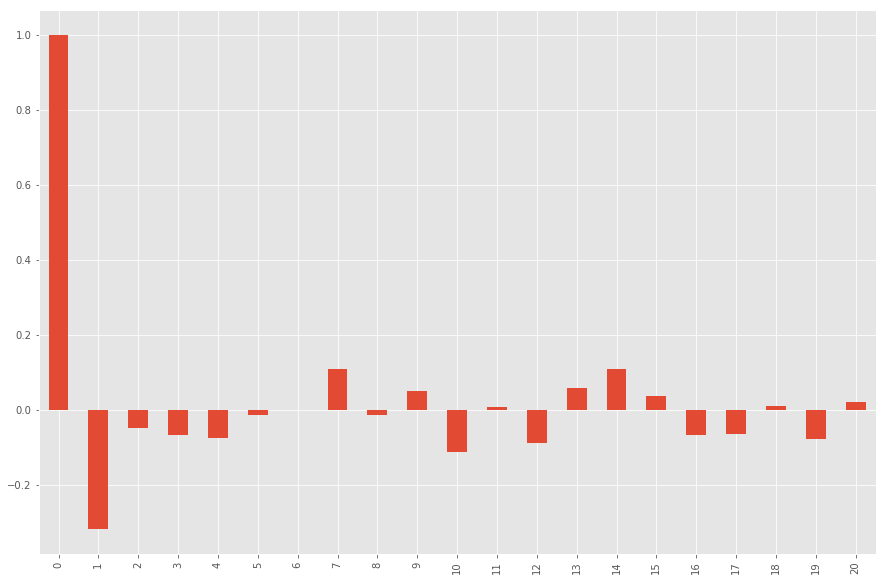

In [104]:
ACF.plot(kind = "bar")

In [105]:
lag_pacf = pacf(ts_diff, nlags=20, method='ols')

In [106]:
PACF = pd.Series(lag_pacf)

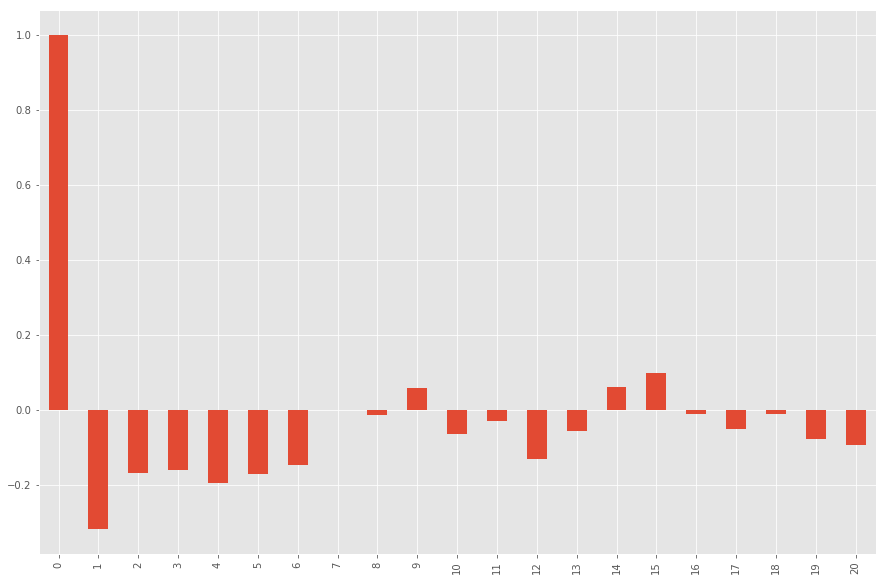

In [107]:
PACF.plot(kind = "bar")

## ARIMA

In [108]:
from statsmodels.tsa.arima_model import ARIMA

In [109]:
ts_diff.head()

Dia
2015-01-12    0.000000
2015-01-13    0.451985
2015-01-14   -0.606136
2015-01-15    0.287682
2015-01-16   -0.470004
Freq: D, Name: ConversionesLogDiff, dtype: float64

In [110]:
# ARIMA Model(1,0,0)
model_AR1MA = ARIMA(ts_diff, order=(1,0,0))

In [111]:
results_ARIMA = model_AR1MA.fit(disp = -1)

In [112]:
results_ARIMA.fittedvalues.head()

Dia
2015-01-12    0.001448
2015-01-13    0.001910
2015-01-14   -0.142184
2015-01-15    0.195148
2015-01-16   -0.089804
Freq: D, dtype: float64

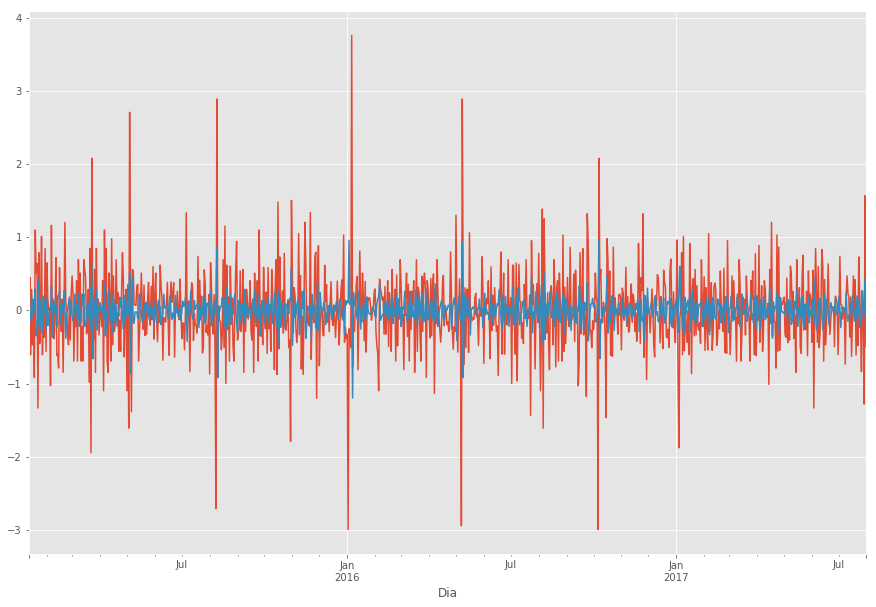

In [113]:
ts_diff.plot()
results_ARIMA.fittedvalues.plot()

In [114]:
ts_diff.sum()

1.3862943611198908

In [115]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.tail()

Dia
2017-07-27    0.268508
2017-07-28   -0.083613
2017-07-29   -0.016312
2017-07-30    0.410275
2017-07-31   -0.498169
Freq: D, dtype: float64

In [116]:
predictions_ARIMA_diff.sum()

1.386752542207954

In [117]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.tail()

Dia
2017-07-27    1.574572
2017-07-28    1.490959
2017-07-29    1.474647
2017-07-30    1.884922
2017-07-31    1.386753
Freq: D, dtype: float64

In [118]:
ts.ix[0]

C:\Users\usuario\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


1.9459101490553132

In [119]:
predictions_ARIMA_log = pd.Series(ts.ix[0], index=ts.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.tail()

Dia
2017-07-27    3.520482
2017-07-28    3.436869
2017-07-29    3.420557
2017-07-30    3.830832
2017-07-31    3.332663
Freq: D, dtype: float64

In [120]:
train1['ConversionesARIMA'] = np.exp(predictions_ARIMA_log)

C:\Users\usuario\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


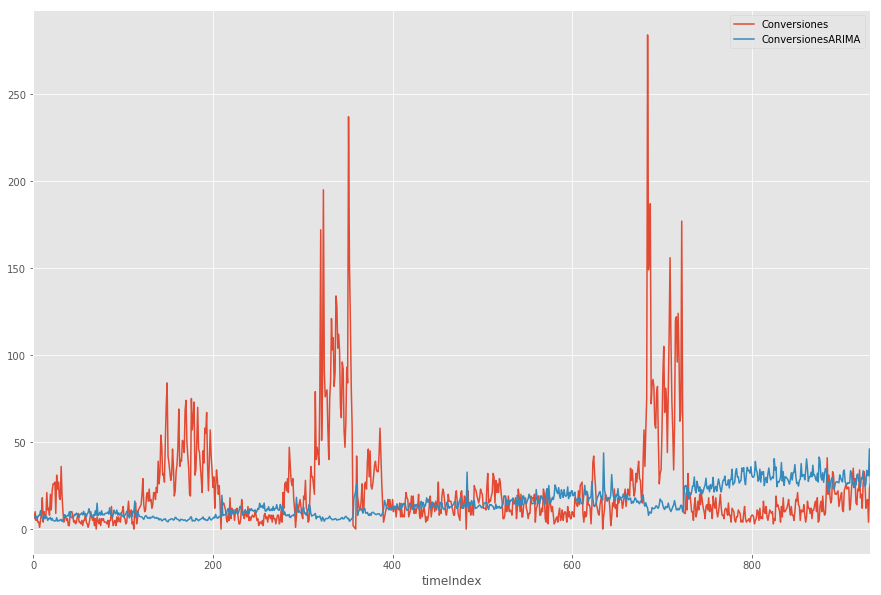

In [121]:
train1.plot(kind="line", x="timeIndex", y = ["Conversiones", "ConversionesARIMA"])

Tras hacer varias pruebas con distintos parámetros del modelo ARIMA no hemos encontrado ninguna combinación que se ajuste correctamente a los datos. 